# Keyword Extraction using TF-IDF and Bag of Words

This notebook demonstrates how to perform keyword extraction using two popular methods: TF-IDF and Bag of Words (BoW). We'll compare the results to understand the differences between these techniques.


## Step 1: Import Libraries

First, we need to import the necessary libraries for vectorization and data handling.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Define Text Data

We'll use a small set of example documents for our keyword extraction demonstration.


In [2]:
# Example text data
documents = [
    "Natural Language Processing (NLP) is a field of artificial intelligence.",
    "Keyword extraction is a process to automatically identify important words and phrases.",
    "TF-IDF stands for Term Frequency-Inverse Document Frequency.",
    "Keyword extraction methods include TF-IDF, RAKE, and others."
]


## Step 3: Bag of Words (BoW) Keyword Extraction

In this step, we'll use the Bag of Words (BoW) method to extract keywords from our documents. BoW provides a simple frequency count of words.


In [19]:
# Initialize Count Vectorizer (BoW)
bow_vectorizer = CountVectorizer(stop_words='english', max_features=25)

# Fit and transform the text data
bow_matrix = bow_vectorizer.fit_transform(documents)

# Convert BoW matrix to a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Display the DataFrame
print("Bag of Words (BoW) Keyword Extraction:")
print(bow_df)


Bag of Words (BoW) Keyword Extraction:
   artificial  automatically  document  extraction  field  frequency  \
0           1              0         0           0      1          0   
1           0              1         0           1      0          0   
2           0              0         1           0      0          2   
3           0              0         0           1      0          0   

   identify  idf  important  include  ...  natural  nlp  phrases  process  \
0         0    0          0        0  ...        1    1        0        0   
1         1    0          1        0  ...        0    0        1        1   
2         0    1          0        0  ...        0    0        0        0   
3         0    1          0        1  ...        0    0        0        0   

   processing  rake  stands  term  tf  words  
0           1     0       0     0   0      0  
1           0     0       0     0   0      1  
2           0     0       1     1   1      0  
3           0     1       

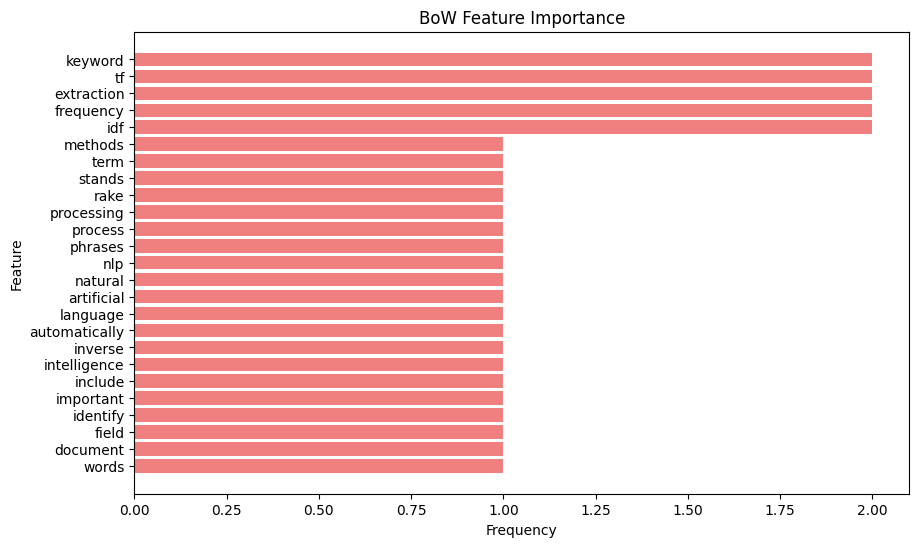

In [20]:

# Sum BoW frequencies for each feature
bow_scores = bow_matrix.sum(axis=0).A1
bow_features = bow_vectorizer.get_feature_names_out()
bow_importance = pd.DataFrame({'Feature': bow_features, 'Frequency': bow_scores})

# Sort by frequency
bow_importance = bow_importance.sort_values(by='Frequency', ascending=False)

# Plot the BoW frequencies
plt.figure(figsize=(10, 6))
plt.barh(bow_importance['Feature'], bow_importance['Frequency'], color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('BoW Feature Importance')
plt.gca().invert_yaxis()
plt.show()

## Step 4: TF-IDF Keyword Extraction

Next, we'll use the TF-IDF method to extract keywords. TF-IDF weighs words by their importance in the documents relative to the entire corpus.


In [17]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=25)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the DataFrame
print("TF-IDF Keyword Extraction:")
print(tfidf_df)


TF-IDF Keyword Extraction:
   artificial  automatically  document  extraction     field  frequency  \
0    0.377964       0.000000  0.000000    0.000000  0.377964   0.000000   
1    0.000000       0.371565  0.000000    0.292946  0.000000   0.000000   
2    0.000000       0.000000  0.328919    0.000000  0.000000   0.657838   
3    0.000000       0.000000  0.000000    0.336597  0.000000   0.000000   

   identify       idf  important   include  ...   natural       nlp   phrases  \
0  0.000000  0.000000   0.000000  0.000000  ...  0.377964  0.377964  0.000000   
1  0.371565  0.000000   0.371565  0.000000  ...  0.000000  0.000000  0.371565   
2  0.000000  0.259324   0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3  0.000000  0.336597   0.000000  0.426931  ...  0.000000  0.000000  0.000000   

    process  processing      rake    stands      term        tf     words  
0  0.000000    0.377964  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.371565    0.000000  0.000000  0.00

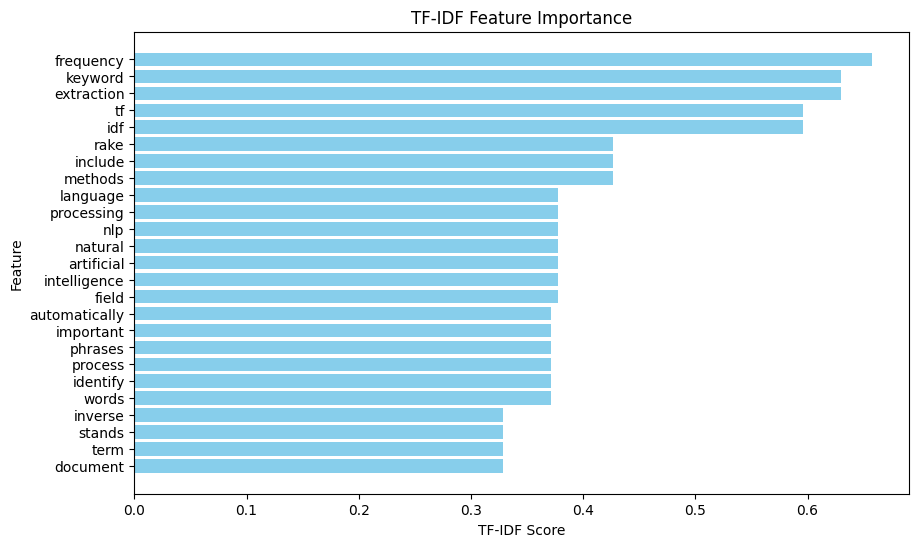

In [18]:
# Sum TF-IDF scores for each feature
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_importance = pd.DataFrame({'Feature': tfidf_features, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF score
tfidf_importance = tfidf_importance.sort_values(by='TF-IDF Score', ascending=False)

# Plot the TF-IDF scores
plt.figure(figsize=(10, 6))
plt.barh(tfidf_importance['Feature'], tfidf_importance['TF-IDF Score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.title('TF-IDF Feature Importance')
plt.gca().invert_yaxis()
plt.show()


## Step 5: Comparison of Results

Finally, we'll compare the results of the BoW and TF-IDF methods to see the differences in the extracted keywords.


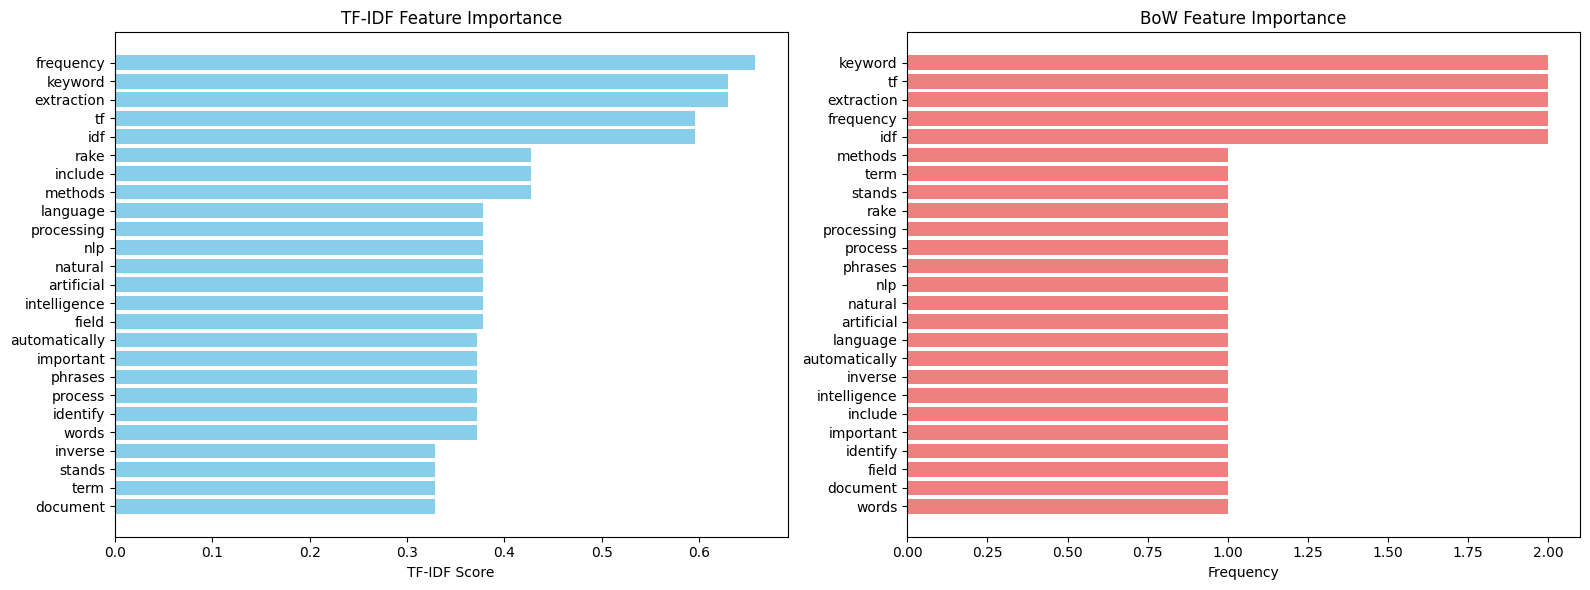

In [21]:
import matplotlib.pyplot as plt

# Sum TF-IDF scores for each feature
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_importance = pd.DataFrame({'Feature': tfidf_features, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF score
tfidf_importance = tfidf_importance.sort_values(by='TF-IDF Score', ascending=False)

# Sum BoW frequencies for each feature
bow_scores = bow_matrix.sum(axis=0).A1
bow_features = bow_vectorizer.get_feature_names_out()
bow_importance = pd.DataFrame({'Feature': bow_features, 'Frequency': bow_scores})

# Sort by frequency
bow_importance = bow_importance.sort_values(by='Frequency', ascending=False)

# Plot side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot TF-IDF scores
axes[0].barh(tfidf_importance['Feature'], tfidf_importance['TF-IDF Score'], color='skyblue')
axes[0].set_xlabel('TF-IDF Score')
axes[0].set_title('TF-IDF Feature Importance')
axes[0].invert_yaxis()

# Plot BoW frequencies
axes[1].barh(bow_importance['Feature'], bow_importance['Frequency'], color='lightcoral')
axes[1].set_xlabel('Frequency')
axes[1].set_title('BoW Feature Importance')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
